In [259]:
import pandas as pd
import numpy as np
import haversine as hs
import math
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [170]:
seoulbuilding = pd.read_csv("data/서울빌딩_위경도포함.csv")

In [178]:
seoulbuilding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433923 entries, 0 to 433922
Data columns (total 43 columns):
index        433923 non-null int64
A0           433923 non-null object
A1           433923 non-null int64
A2           433923 non-null int64
A3           433923 non-null object
A4           433923 non-null int64
A5           433923 non-null object
A6           433923 non-null object
A7           433923 non-null int64
A8           433923 non-null int64
A9           433923 non-null object
A10          433923 non-null int64
A11          433923 non-null object
A12          29202 non-null object
A13          425455 non-null float64
A14          427457 non-null float64
A15          427429 non-null float64
A16          433923 non-null int64
A17          433765 non-null float64
A18          433686 non-null float64
A19          16479 non-null object
A20          433878 non-null float64
A21          433878 non-null object
A22          433923 non-null float64
A23          433923 non-null

In [179]:
hll = seoulbuilding[['A22','A23','A24','A25','A26','A31','A33','A32','Longitude','Latitude']]
hll

,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude
0,0.00,0.00,344.040,0.00000,0.00000,36.535036,1,3,127.007790,37.571628
1,115.43,66.44,214.560,129.88000,57.56000,9.100000,1,3,127.066429,37.565693
2,0.00,0.00,39.640,0.00000,0.00000,9.004290,0,1,126.969804,37.603152
3,37866.80,617.92,3108.690,5.92786,1.63183,23.450000,1,4,127.001038,37.574943
4,0.00,0.00,48.560,0.00000,0.00000,24.356690,0,2,126.971813,37.578504
5,1374.00,600.09,1959.880,65.88000,43.67000,10.850000,2,2,126.977798,37.609241
6,0.00,0.00,446.930,0.00000,0.00000,54.705010,1,4,127.007643,37.573621
7,277.70,166.41,1641.020,495.48000,59.92000,27.900000,1,10,127.001350,37.570472
8,0.00,0.00,36.360,0.00000,0.00000,9.004290,0,1,126.969960,37.578972
9,0.00,0.00,26.450,0.00000,0.00000,9.004290,0,1,126.998077,37.573000


In [180]:
hll2 = hll[hll['A23']==0]
hll3 = hll2[hll2['A22']==0]
hll4 = hll3[hll3['A26']==0]
hll4

,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude
0,0.0,0.0,344.04,0.0,0.0,36.535036,1,3,127.007790,37.571628
2,0.0,0.0,39.64,0.0,0.0,9.004290,0,1,126.969804,37.603152
4,0.0,0.0,48.56,0.0,0.0,24.356690,0,2,126.971813,37.578504
6,0.0,0.0,446.93,0.0,0.0,54.705010,1,4,127.007643,37.573621
8,0.0,0.0,36.36,0.0,0.0,9.004290,0,1,126.969960,37.578972
9,0.0,0.0,26.45,0.0,0.0,9.004290,0,1,126.998077,37.573000
11,0.0,0.0,36.36,0.0,0.0,9.567604,0,1,126.998528,37.573179
12,0.0,0.0,106.15,0.0,0.0,18.008579,1,2,126.972942,37.568809
13,0.0,0.0,79.34,0.0,0.0,9.004290,0,1,126.991900,37.573694
15,0.0,0.0,107.77,0.0,0.0,9.004290,0,1,126.992948,37.567365


In [181]:
hll5= hll4[hll4['A24']==0]
hll6= hll5[hll5['A32']==0]
hll7= hll6[hll6['A33']==0]
hll7

,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude
49,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.969074,37.567254
2747,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.976925,37.609734
17431,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.973164,37.564171
100428,0.0,0.0,0.0,0.0,0.0,0.0,0,0,127.026357,37.578658
181628,0.0,0.0,0.0,0.0,0.0,NaN,0,0,126.958558,37.552058
248997,0.0,0.0,0.0,0.0,0.0,0.0,0,0,127.035186,37.466063
343432,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.999583,37.563391
375184,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.917877,37.616465


In [182]:
hll4.shape

(91233, 10)

In [183]:
for i in dropList:
    seoulbuilding.drop(index=i,inplace=True)

In [184]:
seoulbuilding.shape

(433923, 43)

In [185]:
hl2 = hll2[hll2['A32']==0]
hl3 = hl2[hl2['A24']==0]
hl3

,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude
49,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.969074,37.567254
2747,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.976925,37.609734
17431,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.973164,37.564171
100428,0.0,0.0,0.0,0.0,0.0,0.0,0,0,127.026357,37.578658
181628,0.0,0.0,0.0,0.0,0.0,NaN,0,0,126.958558,37.552058
248997,0.0,0.0,0.0,0.0,0.0,0.0,0,0,127.035186,37.466063
305242,0.0,0.0,0.0,0.0,0.0,0.0,1,0,127.133344,37.467429
343432,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.999583,37.563391
375184,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.917877,37.616465
384356,0.0,0.0,0.0,0.0,0.0,4.0,1,0,126.975912,37.611448


In [186]:
hl3=hl2[hl2['A24']==0]
hl4=hl3[hl3['A32']==0]
hl4

,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude
49,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.969074,37.567254
2747,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.976925,37.609734
17431,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.973164,37.564171
100428,0.0,0.0,0.0,0.0,0.0,0.0,0,0,127.026357,37.578658
181628,0.0,0.0,0.0,0.0,0.0,NaN,0,0,126.958558,37.552058
248997,0.0,0.0,0.0,0.0,0.0,0.0,0,0,127.035186,37.466063
305242,0.0,0.0,0.0,0.0,0.0,0.0,1,0,127.133344,37.467429
343432,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.999583,37.563391
375184,0.0,0.0,0.0,0.0,0.0,0.0,0,0,126.917877,37.616465
384356,0.0,0.0,0.0,0.0,0.0,4.0,1,0,126.975912,37.611448


In [187]:
hll4.shape

(91233, 10)

In [188]:
tmp = seoulbuilding[seoulbuilding['A24']==0]
tmp = tmp[tmp['A23']==0]
tmp[tmp['A22'] == 0]

,index,A0,A1,A2,A3,A4,A5,A6,A7,A8,...,A32,A33,A34,A35,A36,A37,A38,Longitude,Latitude,geometry
49,49,0000197012784519100000000000,1111012100100020064,1111012100,서울특별시 종로구 신문로2가,1,일반,2-64,26608,1,...,0,0,NaN,NaN,0,0.00,2019-03-03,126.969074,37.567254,POINT (126.9690737970339 37.56725448436582)
2747,2747,0000197707644566240200000000,1111018300100990035,1111018300,서울특별시 종로구 평창동,1,일반,99-35,23221,1,...,0,0,NaN,NaN,0,0.00,2019-03-03,126.976925,37.609734,POINT (126.9769251481118 37.60973414705884)
4243,4243,0000198557184535594300000000,1111014600100010152,1111014600,서울특별시 종로구 가회동,1,일반,1-152,28963,1,...,2,1,NaN,NaN,0,0.00,2019-03-03,126.986554,37.582121,POINT (126.986553858169 37.58212110830532)
4952,4952,0000201722154525216500000000,1111017500101870001,1111017500,서울특별시 종로구 숭인동,1,일반,187-1,18563,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,127.022387,37.572769,POINT (127.0223871714933 37.57276924851509)
8172,8172,1970196819124557938600000000,1111018300102850002,1111018300,서울특별시 종로구 평창동,1,일반,285-2,5911,1,...,2,0,NaN,19700116.0,0,0.00,2019-03-03,126.966865,37.602251,POINT (126.9668647056903 37.60225102409284)
13317,13317,1977200563154512305600000000,1114014300100260011,1114014300,서울특별시 중구 장충동1가,1,일반,26-11,8707,1,...,4,1,NaN,19771111.0,0,0.00,2019-03-03,127.009265,37.561137,POINT (127.0092648902647 37.56113674050145)
13514,13514,2002201351954512466800000000,1114016200101020006,1114016200,서울특별시 중구 신당동,1,일반,102-6,16093,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,127.018194,37.561281,POINT (127.0181936794117 37.56128110025927)
14457,14457,0000201193854507584300000000,1114016200103300002,1114016200,서울특별시 중구 신당동,1,일반,330-2,19204,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,127.016403,37.556882,POINT (127.0164033630526 37.5568817376644)
14811,14811,1975199178224514502800000000,1114015500103200011,1114015500,서울특별시 중구 을지로3가,1,일반,320-11,13335,1,...,2,1,NaN,NaN,0,0.00,2019-03-03,126.993588,37.563116,POINT (126.9935879522878 37.56311644221958)
16894,16894,0000201229124505924900000000,1114016200103300002,1114016200,서울특별시 중구 신당동,1,일반,330-2,19208,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,127.016802,37.555386,POINT (127.0168022284991 37.55538638707377)


In [189]:
a22 = seoulbuilding['A22'].values
a23 = seoulbuilding['A23'].values
a24 = seoulbuilding['A24'].values
a25 = seoulbuilding['A25'].values
a26 = seoulbuilding['A26'].values
a32 = seoulbuilding['A32'].values
a33 = seoulbuilding['A33'].values

In [190]:
print(len(a22),type(a22))
print(len(a23),type(a23))
print(len(a24),type(a24))
print(len(a25),type(a25))
print(len(a26),type(a26))
print(len(a32),type(a32))
print(len(a33),type(a33))

433923 <class 'numpy.ndarray'>
433923 <class 'numpy.ndarray'>
433923 <class 'numpy.ndarray'>
433923 <class 'numpy.ndarray'>
433923 <class 'numpy.ndarray'>
433923 <class 'numpy.ndarray'>
433923 <class 'numpy.ndarray'>


In [197]:
zeroList = []
for i in range(len(a24)):
    if a23[i] == 0:
        if (a22[i] != 0 and a26[i] != 0):
            a23[i] = a22[i] * a26[i]/100
            print("sucess")
        elif (a24[i] != 0 and (a33[i] != 0 or a32[i] != 0)):
            a23[i] = a24[i] / (a32[i]+a33[i])
            print("sucess")
        elif (a22[i] != 0 and a25[i] != 0 and (a33[i] != 0 or a32[i] != 0)):
            a23[i] = (a22[i] * a25[i]/100) / (a32[i]+a33[i])
            print("sucess")
        else:
            print(i,a23[i],a22[i],a26[i],a24[i],a32[i],a33[i],a25[i])
            zeroList.append(i)
            

a23

49 0.0 0.0 0.0 0.0 0 0 0.0
179 0.0 126.1 0.0 0.0 1 0 0.0
1634 0.0 76.4 0.0 0.0 2 1 0.0
2074 0.0 376.2 0.0 0.0 6 0 0.0
2094 0.0 82.9 0.0 0.0 2 0 0.0
2747 0.0 0.0 0.0 0.0 0 0 0.0
3177 0.0 464.0 0.0 0.0 3 1 0.0
3481 0.0 0.0 0.0 59.5 0 0 0.0
3620 0.0 875.63 0.0 0.0 2 1 0.0
4243 0.0 0.0 0.0 0.0 2 1 0.0
4597 0.0 120.7 0.0 0.0 3 0 0.0
4952 0.0 0.0 0.0 0.0 1 0 0.0
5177 0.0 70.61 0.0 0.0 4 1 0.0
5421 0.0 0.0 0.0 396.69 0 0 0.0
5486 0.0 77.0 0.0 0.0 1 0 0.0
5938 0.0 85.2 0.0 0.0 2 1 0.0
6515 0.0 102.5 0.0 0.0 1 1 0.0
6790 0.0 130.6 0.0 0.0 1 0 0.0
7170 0.0 0.0 0.0 176.86 0 0 0.0
7313 0.0 483.0 0.0 0.0 2 1 0.0
8055 0.0 331.0 0.0 0.0 2 1 0.0
8093 0.0 0.0 0.0 59.33 0 0 0.0
8094 0.0 0.0 0.0 40.1 0 0 0.0
8172 0.0 0.0 0.0 0.0 2 0 0.0
8492 0.0 82.6 0.0 0.0 1 0 0.0
10048 0.0 72.7 0.0 0.0 1 0 0.0
10552 0.0 0.0 0.0 493.02 0 0 0.0
11227 0.0 0.0 0.0 380.16 0 0 0.0
11278 0.0 0.0 0.0 227.77 0 0 0.0
11580 0.0 0.0 0.0 195.03 0 0 0.0
12302 0.0 0.0 0.0 132.24 0 0 0.0
12433 0.0 0.0 0.0 426.71 0 0 0.0
12435 0.0 0.0

array([  86.01,   66.44,   39.64, ...,   46.28, 4595.59,   55.44])

In [192]:
a23[a23==0].shape

(270,)

In [193]:
seoulbuilding['A23']=a23
seoulbuilding

,index,A0,A1,A2,A3,A4,A5,A6,A7,A8,...,A32,A33,A34,A35,A36,A37,A38,Longitude,Latitude,geometry
0,0,1968200432784523947800000000,1111016700101790012,1111016700,서울특별시 종로구 충신동,1,일반,179-12,16944,1,...,3,1,NaN,19680705.0,0,0.00,2019-03-03,127.007790,37.571628,POINT (127.0077898163942 37.57162752730336)
1,1,1993205612864517380400000000,1123010600101910016,1123010600,서울특별시 동대문구 장안동,1,일반,191-16,22349,1,...,3,1,19920828.0,19930216.0,0,0.00,2019-03-03,127.066429,37.565693,POINT (127.0664287456171 37.56569262972105)
2,2,0000197078694558937400000000,1111018300102340014,1111018300,서울특별시 종로구 평창동,1,일반,234-14,19336,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,126.969804,37.603152,POINT (126.969804094345 37.60315192857253)
3,3,2002199836434527626700000000,1111016600100280022,1111016600,서울특별시 종로구 연건동,1,일반,28-22,2839,1,...,4,1,19981109.0,20020828.0,18,0.00,2019-03-03,127.001038,37.574943,POINT (127.0010384903253 37.57494266882181)
4,4,1968197255194531583800000000,1111010800100190001,1111010800,서울특별시 종로구 통인동,1,일반,19-1,26930,1,...,2,0,NaN,19680811.0,0,0.00,2019-03-03,126.971813,37.578504,POINT (126.9718133008424 37.57850428274822)
5,5,2003197784694565692200000000,1111018300104650010,1111018300,서울특별시 종로구 평창동,1,일반,465-10,17555,1,...,2,2,20010525.0,20030628.0,17,343.36,2019-03-03,126.977798,37.609241,POINT (126.977798024635 37.60924056620688)
6,6,1986200419824526159900000000,1111016700100480000,1111016700,서울특별시 종로구 충신동,1,일반,48,19430,1,...,4,1,19841230.0,19860725.0,0,0.00,2019-03-03,127.007643,37.573621,POINT (127.007643323125 37.57362083431165)
7,7,2002199863924522664800000000,1111016000102000000,1111016000,서울특별시 종로구 연지동,1,일반,200,13904,1,...,10,1,20010509.0,20020909.0,6,93.72,2019-03-03,127.001350,37.570472,POINT (127.0013497468139 37.57047155753587)
8,8,0000197091544532103100000000,1111011100101270001,1111011100,서울특별시 종로구 옥인동,1,일반,127-1,28971,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,126.969960,37.578972,POINT (126.9699603128816 37.57897173499605)
9,9,0000199574814525471000000000,1111015900102140004,1111015900,서울특별시 종로구 원남동,1,일반,214-4,28871,1,...,1,0,NaN,NaN,0,0.00,2019-03-03,126.998077,37.573000,POINT (126.9980766667283 37.57300009938525)


In [199]:
seoulbuilding.drop(zeroList, inplace=True)

In [200]:
seoulbuilding.shape

(433653, 43)

In [226]:
hll = seoulbuilding[['A22','A23','A24','A25','A26','A31','A33','A32','Longitude','Latitude']]
hll.sort_values(['Longitude','Latitude'],inplace=True)
hll

C:\Users\B-16\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude
200379,245.00,146.700,146.70,59.88000,59.88000,5.100000,0,1,126.770190,37.554222
280371,0.00,45.120,45.12,0.00000,0.00000,4.000000,0,1,126.770253,37.553449
281295,0.00,70.000,70.00,0.00000,0.00000,3.500000,0,1,126.770263,37.553645
281530,0.00,152.350,268.80,0.00000,0.00000,7.650000,0,2,126.770348,37.553239
282061,0.00,208.000,208.00,0.00000,0.00000,7.650000,0,1,126.770400,37.553355
309298,1492.00,298.650,494.25,33.13000,20.02000,12.000000,0,3,126.770472,37.554047
294533,1500.00,298.630,433.34,28.89000,19.91000,8.700000,0,2,126.770639,37.551904
404404,3294.00,444.870,594.45,18.05000,13.51000,12.150000,0,2,126.770866,37.552799
313843,2879.00,325.000,325.00,11.29000,11.29000,7.000000,0,1,126.777133,37.555577
299471,0.00,48.600,48.60,0.00000,0.00000,9.004290,0,1,126.780046,37.554579


In [234]:
hll['sub_height'] = hll['A23']
b = hll['A23'].values

C:\Users\B-16\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
a = hll['sub_height'].values
for i in range(len(a)):
    a[i] = math.sqrt(a[i])
print(a,b)

[12.11197754  6.71714225  8.36660027 ... 12.9614814  18.51107776
 25.10199195] [146.7   45.12  70.   ... 168.   342.66 630.11]


In [236]:
hll

,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude,sub_height
200379,245.00,146.700,146.70,59.88000,59.88000,5.100000,0,1,126.770190,37.554222,12.111978
280371,0.00,45.120,45.12,0.00000,0.00000,4.000000,0,1,126.770253,37.553449,6.717142
281295,0.00,70.000,70.00,0.00000,0.00000,3.500000,0,1,126.770263,37.553645,8.366600
281530,0.00,152.350,268.80,0.00000,0.00000,7.650000,0,2,126.770348,37.553239,12.343014
282061,0.00,208.000,208.00,0.00000,0.00000,7.650000,0,1,126.770400,37.553355,14.422205
309298,1492.00,298.650,494.25,33.13000,20.02000,12.000000,0,3,126.770472,37.554047,17.281493
294533,1500.00,298.630,433.34,28.89000,19.91000,8.700000,0,2,126.770639,37.551904,17.280914
404404,3294.00,444.870,594.45,18.05000,13.51000,12.150000,0,2,126.770866,37.552799,21.091942
313843,2879.00,325.000,325.00,11.29000,11.29000,7.000000,0,1,126.777133,37.555577,18.027756
299471,0.00,48.600,48.60,0.00000,0.00000,9.004290,0,1,126.780046,37.554579,6.971370


In [237]:
hll['wall_Slide']=hll['sub_height']*math.tan(math.radians(56.9))
hll

C:\Users\B-16\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude,sub_height,wall_Slide
200379,245.00,146.700,146.70,59.88000,59.88000,5.100000,0,1,126.770190,37.554222,12.111978,18.579736
280371,0.00,45.120,45.12,0.00000,0.00000,4.000000,0,1,126.770253,37.553449,6.717142,10.304075
281295,0.00,70.000,70.00,0.00000,0.00000,3.500000,0,1,126.770263,37.553645,8.366600,12.834339
281530,0.00,152.350,268.80,0.00000,0.00000,7.650000,0,2,126.770348,37.553239,12.343014,18.934146
282061,0.00,208.000,208.00,0.00000,0.00000,7.650000,0,1,126.770400,37.553355,14.422205,22.123618
309298,1492.00,298.650,494.25,33.13000,20.02000,12.000000,0,3,126.770472,37.554047,17.281493,26.509757
294533,1500.00,298.630,433.34,28.89000,19.91000,8.700000,0,2,126.770639,37.551904,17.280914,26.508869
404404,3294.00,444.870,594.45,18.05000,13.51000,12.150000,0,2,126.770866,37.552799,21.091942,32.354973
313843,2879.00,325.000,325.00,11.29000,11.29000,7.000000,0,1,126.777133,37.555577,18.027756,27.654522
299471,0.00,48.600,48.60,0.00000,0.00000,9.004290,0,1,126.780046,37.554579,6.971370,10.694060


In [240]:
hll['shadow_length']=hll['A31']/math.tan(math.radians(56.9))

C:\Users\B-16\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
hll['shadow'] = hll['wall_Slide'] * hll['shadow_length']
hll

C:\Users\B-16\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,A22,A23,A24,A25,A26,A31,A33,A32,Longitude,Latitude,sub_height,wall_Slide,shadow,shadow_length
200379,245.00,146.700,146.70,59.88000,59.88000,5.100000,0,1,126.770190,37.554222,12.111978,18.579736,61.771085,3.324648
280371,0.00,45.120,45.12,0.00000,0.00000,4.000000,0,1,126.770253,37.553449,6.717142,10.304075,26.868569,2.607567
281295,0.00,70.000,70.00,0.00000,0.00000,3.500000,0,1,126.770263,37.553645,8.366600,12.834339,29.283101,2.281621
281530,0.00,152.350,268.80,0.00000,0.00000,7.650000,0,2,126.770348,37.553239,12.343014,18.934146,94.424059,4.986972
282061,0.00,208.000,208.00,0.00000,0.00000,7.650000,0,1,126.770400,37.553355,14.422205,22.123618,110.329869,4.986972
309298,1492.00,298.650,494.25,33.13000,20.02000,12.000000,0,3,126.770472,37.554047,17.281493,26.509757,207.377916,7.822702
294533,1500.00,298.630,433.34,28.89000,19.91000,8.700000,0,2,126.770639,37.551904,17.280914,26.508869,150.343955,5.671459
404404,3294.00,444.870,594.45,18.05000,13.51000,12.150000,0,2,126.770866,37.552799,21.091942,32.354973,256.267090,7.920485
313843,2879.00,325.000,325.00,11.29000,11.29000,7.000000,0,1,126.777133,37.555577,18.027756,27.654522,126.194295,4.563243
299471,0.00,48.600,48.60,0.00000,0.00000,9.004290,0,1,126.780046,37.554579,6.971370,10.694060,62.772235,5.869823


In [245]:
last_building = hll[['A23','A31','Longitude','Latitude','wall_Slide','shadow_length','shadow']]
last_building

,A23,A31,Longitude,Latitude,wall_Slide,shadow_length,shadow
200379,146.700,5.100000,126.770190,37.554222,18.579736,3.324648,61.771085
280371,45.120,4.000000,126.770253,37.553449,10.304075,2.607567,26.868569
281295,70.000,3.500000,126.770263,37.553645,12.834339,2.281621,29.283101
281530,152.350,7.650000,126.770348,37.553239,18.934146,4.986972,94.424059
282061,208.000,7.650000,126.770400,37.553355,22.123618,4.986972,110.329869
309298,298.650,12.000000,126.770472,37.554047,26.509757,7.822702,207.377916
294533,298.630,8.700000,126.770639,37.551904,26.508869,5.671459,150.343955
404404,444.870,12.150000,126.770866,37.552799,32.354973,7.920485,256.267090
313843,325.000,7.000000,126.777133,37.555577,27.654522,4.563243,126.194295
299471,48.600,9.004290,126.780046,37.554579,10.694060,5.869823,62.772235


In [249]:
#1km당 위도
lon_km = 1/109.95848912964995517860101624644
#1km당 경도
lat_km = 1/88.74
print(lon_km,lat_km)

0.009094341036469854 0.01126887536623845


In [254]:
lon_m = lon_km/1000
lat_m = lat_km/1000
print(300*lon_m,lat_m)

0.002728302310940956 1.126887536623845e-05


In [255]:
test = hll.head(100)

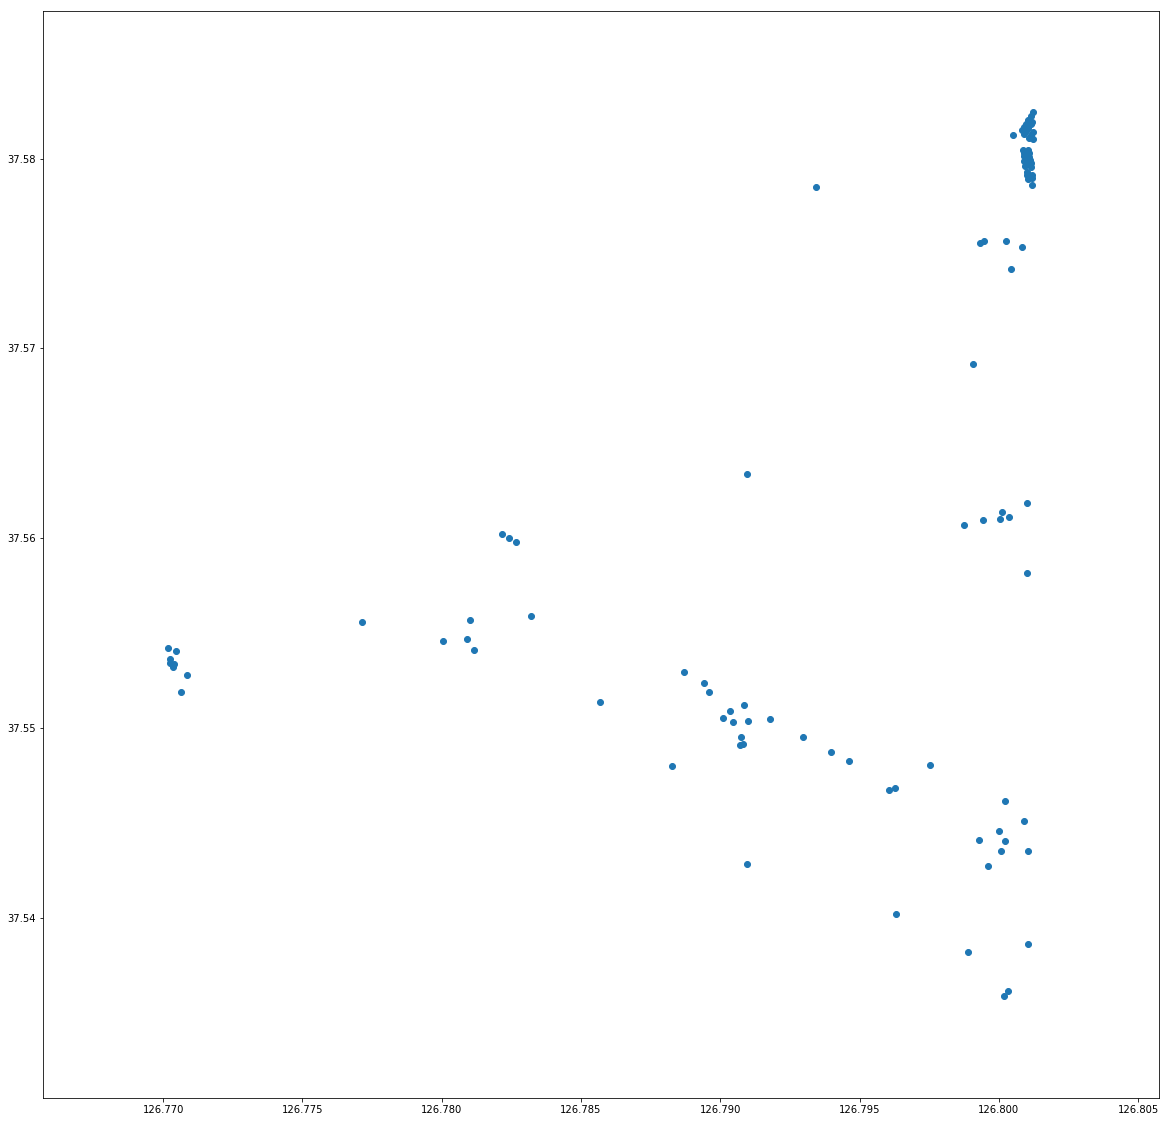

In [264]:
fig, axes = plt.subplots(1)
fig.set_size_inches(20,20)
axes= plt.scatter(test['Longitude'],test['Latitude'])
plt.show()